In [1]:
import numpy as np
from matplotlib import pyplot as plt
import pickle
import pandas as pd
from tqdm import tqdm 

## Important Function 

In [2]:
class Data:
    def __init__(self, array_list):
        self.array_list = array_list

    def save(self, filename):
        with open(filename, 'wb') as f:
            pickle.dump(self.array_list, f)

    @classmethod
    def load(cls, filename):
        with open(filename, 'rb') as f:
            array_list = pickle.load(f)
        return cls(array_list)

## Plain MD

In [9]:
plain_md_path = '../Plain_MD/analysis'


error_loaded = Data.load(f"{plain_md_path}/population_data/error_8_conform.pkl").array_list
errors = error_loaded[0]
errors_err = error_loaded[1]

plain_md_errors = errors
plain_md_errors_err = errors_err

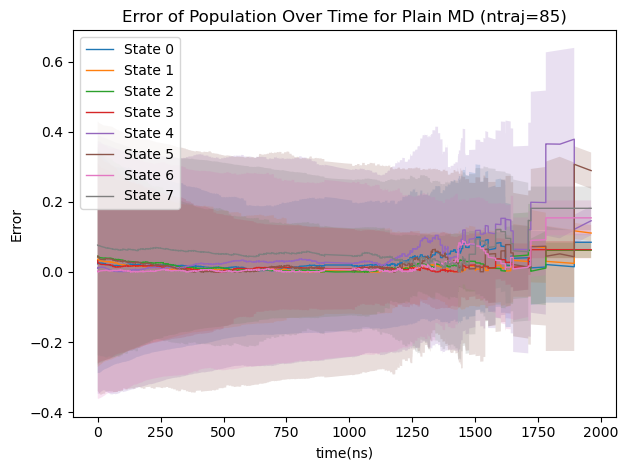

In [10]:
conform_num = 8
T = plain_md_errors.shape[1]
x = np.arange(T)
dt_in_ns = 0.01

for i in range(conform_num):
    mean = plain_md_errors[i]
    std = plain_md_errors_err[i]

    plt.plot(x * dt_in_ns, mean, label=f"State {i}", linewidth=1)
    plt.fill_between(x * dt_in_ns, mean - std, mean + std, alpha=0.2)

plt.xlabel("time(ns)")
plt.ylabel("Error")
#plt.ylim(-0.1, 0.1)
plt.title("Error of Population Over Time for Plain MD (ntraj=85)")
plt.legend(loc='best')
plt.tight_layout()
plt.show()


## Error 

In [18]:
ee_path = '../EE/analysis'


error_loaded = Data.load(f"{ee_path}/population_data/error_8_conform.pkl").array_list
errors = error_loaded[0]
errors_err = error_loaded[1]

ee_errors = errors
ee_errors_err = errors_err
ee_errors.shape

(4, 8, 37002)

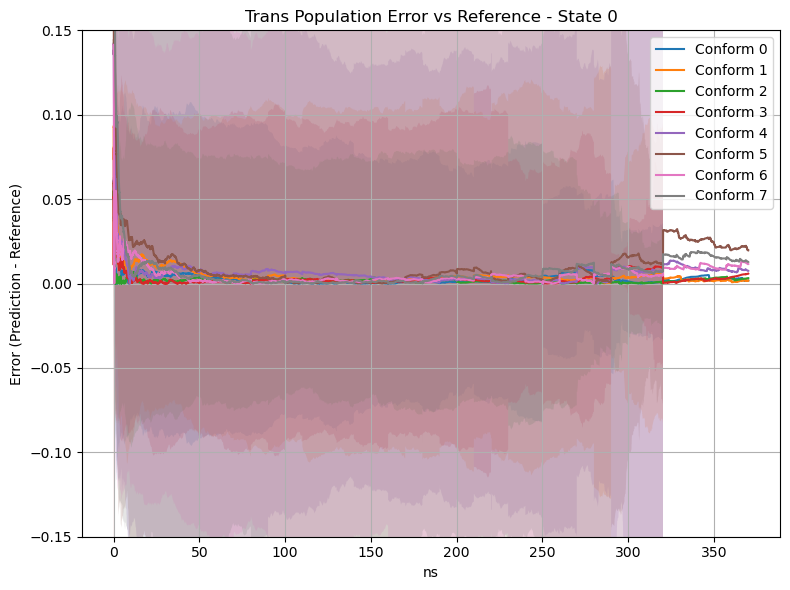

In [22]:
thermo_num = 1
conform_num = 8
dt_in_ns = 0.01 #10 ps
time_step_to_show = 200 # 100 ns

for thermo in range(thermo_num):  # Loop over 6 thermodynamic states

    plt.figure(figsize=(8, 6))  
    for conform in range(conform_num):  # Loop over 8 conformational states
        x = np.arange(ee_errors.shape[2])
        plt.plot(x * dt_in_ns, ee_errors[thermo, conform, :], label=f'Conform {conform}')
        plt.fill_between(x * dt_in_ns, 
                         ee_errors[thermo, conform, :] - ee_errors_err[thermo, conform, :], 
                         ee_errors[thermo, conform, :] + ee_errors_err[thermo, conform, :], 
                         alpha=0.2)

    plt.title(f'Trans Population Error vs Reference - State {thermo}')
    plt.xlabel('ns')
    plt.ylabel('Error (Prediction - Reference)')
    plt.grid(True)
    plt.legend()
    plt.ylim(-0.15, 0.15)
    plt.tight_layout()
    plt.show()


## HREX

In [23]:
hrex_path = '../HREX/analysis'


error_loaded = Data.load(f"{hrex_path}/population_data/error_8_conform.pkl").array_list
errors = error_loaded[0]
errors_err = error_loaded[1]

hrex_errors = errors
hrex_errors_err = errors_err
hrex_errors.shape

(6, 8, 600030)

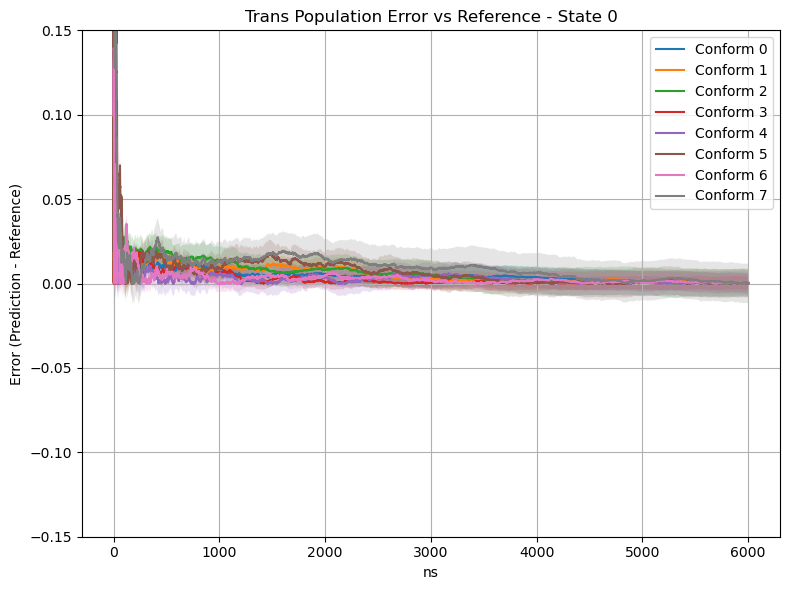

In [25]:
thermo_num = 1
conform_num = 8
dt_in_ns = 0.01 #10 ps
time_step_to_show = 200 # 100 ns

for thermo in range(thermo_num):  # Loop over 6 thermodynamic states

    plt.figure(figsize=(8, 6))  
    for conform in range(conform_num):  # Loop over 8 conformational states
        x = np.arange(hrex_errors.shape[2])
        plt.plot(x * dt_in_ns, hrex_errors[thermo, conform, :], label=f'Conform {conform}')
        plt.fill_between(x * dt_in_ns, 
                         hrex_errors[thermo, conform, :] - hrex_errors_err[thermo, conform, :], 
                         hrex_errors[thermo, conform, :] + hrex_errors_err[thermo, conform, :], 
                         alpha=0.2)

    plt.title(f'Trans Population Error vs Reference - State {thermo}')
    plt.xlabel('ns')
    plt.ylabel('Error (Prediction - Reference)')
    plt.grid(True)
    plt.legend()
    plt.ylim(-0.15, 0.15)
    plt.tight_layout()
    plt.show()


## REDs

In [33]:
reds_path = '../REDs/analysis'


error_loaded = Data.load(f"{reds_path}/population_data/error_8_conform.pkl").array_list
errors = error_loaded[0]
errors_err = error_loaded[1]

reds_errors = errors
reds_errors_err = errors_err
reds_errors.shape

(3, 8, 212509)

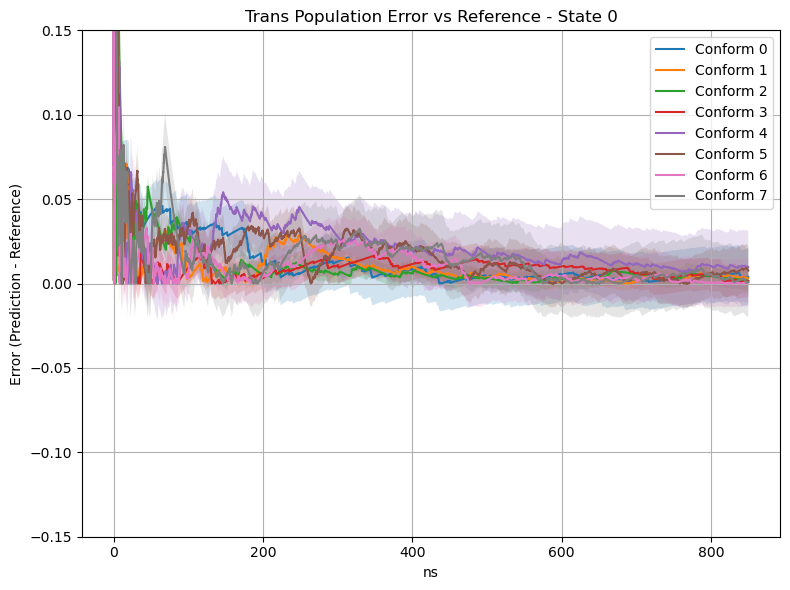

In [35]:
thermo_num = 1
conform_num = 8
dt_in_ns = 0.004 # 4ps

for thermo in range(thermo_num):  # Loop over 6 thermodynamic states
    plt.figure(figsize=(8, 6))

    for conform in range(conform_num):  # Loop over 8 conformational states
        x = np.arange(reds_errors.shape[2])
        plt.plot(x * dt_in_ns, reds_errors[thermo, conform, :], label=f'Conform {conform}')
        plt.fill_between(x * dt_in_ns, 
                          reds_errors[thermo, conform, :] - reds_errors_err[thermo, conform, :],
                          reds_errors[thermo, conform, :] + reds_errors_err[thermo, conform, :], alpha=0.2)
    
    plt.title(f'Trans Population Error vs Reference - State {thermo}')
    plt.xlabel('ns')
    plt.ylabel('Error (Prediction - Reference)')
    plt.grid(True)
    plt.legend()
    plt.ylim(-0.15, 0.15)
    plt.tight_layout()
    plt.show()
